In [60]:
import pandas as pd
import numpy as np
from joblib import dump, load

import seaborn as sns
import matplotlib as plt

from scipy.stats import chi2_contingency
import scipy.stats as stats

In [43]:
df_acc = load(r'..\..\data\processed\2_preprocessing\1.0-simmler-data-preprocessing_accidents.joblib')
df_loca = load(r'..\..\data\processed\2_preprocessing\0.3-munz-data-preprocessing_locations.joblib')
df_indi = load(r'..\..\data\processed\2_preprocessing\1.0-becker-data-preprocessing_usagers.joblib')
df_veh = load(r'..\..\data\processed\2_preprocessing\1.0-leibold-data-preprocessing_vehicles.joblib')

print("accidents shape:", df_acc.shape)
print("locactions shape:", df_loca.shape)
print("individuals shape:", df_indi.shape)
print("vehicles shape:", df_veh.shape)

display(df_acc.head(3))
display(df_loca.head(3))
display(df_indi.head(3))
display(df_veh.head(3))

accidents shape: (327628, 13)
locactions shape: (359510, 20)
individuals shape: (744575, 17)
vehicles shape: (559847, 11)


,acc_num,acc_ambient_lightning,acc_urbanization_level,acc_intersection,acc_atmosphere,acc_collision_type,acc_date,acc_year,acc_month,acc_hour,acc_metro,acc_long,acc_lat
0,201900000001,4.0,1,1.0,1.0,2.0,2019-11-30,2019,11,1,1,2.470120,48.896210
1,201900000002,3.0,1,1.0,1.0,6.0,2019-11-30,2019,11,2,1,2.368800,48.930700
2,201900000003,1.0,1,1.0,1.0,4.0,2019-11-28,2019,11,15,1,2.319174,48.935872


,acc_num,loca_road_cat,loca_road_id,loca_road_idx1,loca_road_idx2,loca_traffic_circul,loca_lanes,loca_reserved_lane,loca_road_gradient,loca_ref_point,loca_ref_point_dist,loca_road_view,loca_land_strip,loca_road_width,loca_road_surface_cond,loca_infrastruc,loca_accident,loca_max_speed,loca_road_no,loca_road
0,201900000001,1,3,0.0,NaN,3,10.0,0,1,6,900,2,NaN,NaN,1,2,1,70.0,3.0,3
1,201900000002,1,1,0.0,NaN,1,2.0,0,4,3,845,2,NaN,NaN,1,0,1,70.0,1.0,1
2,201900000003,1,86,0.0,NaN,3,8.0,0,1,10,500,3,NaN,NaN,1,0,1,90.0,86.0,86


,acc_num,individual_vehID,veh_num,individual_place,individual_cat,individual_severity,individual_sex,individual_trip,individual_secu1,individual_secu2,user_secu3,individual_location,individual_action,individual_companionship,year,age,individual_id
0,201900000001,138 306 524,B01,2,2,2,2,0,1,0,-1,-1,-1,-1,2019,17,NaN
1,201900000001,138 306 524,B01,1,1,2,2,5,1,0,-1,-1,-1,-1,2019,26,NaN
2,201900000001,138 306 525,A01,1,1,1,1,0,1,0,-1,-1,-1,-1,2019,60,NaN


,acc_num,veh_traffic_direction,veh_cat,veh_public_occupants,veh_fixed_obstacle,veh_moving_obstacle,veh_impact,veh_maneuver,veh_num,veh_motor,veh_id
0,201900000001,2.0,7.0,NaN,0.0,2.0,5.0,23.0,B01,1.0,138 306 524
1,201900000001,2.0,17.0,NaN,1.0,0.0,3.0,11.0,A01,1.0,138 306 525
2,201900000002,1.0,7.0,NaN,4.0,0.0,1.0,NaN,A01,1.0,138 306 523


In [44]:
df_acc.info()
df_loca.info()
df_indi.info()
df_veh.info()


<class 'pandas.core.frame.DataFrame'>
Index: 327628 entries, 0 to 54401
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   acc_num                 327628 non-null  int64         
 1   acc_ambient_lightning   327619 non-null  float64       
 2   acc_urbanization_level  327628 non-null  int64         
 3   acc_intersection        327614 non-null  float64       
 4   acc_atmosphere          327602 non-null  float64       
 5   acc_collision_type      326009 non-null  float64       
 6   acc_date                327628 non-null  datetime64[ns]
 7   acc_year                327628 non-null  int64         
 8   acc_month               327628 non-null  int64         
 9   acc_hour                327628 non-null  int64         
 10  acc_metro               327628 non-null  int64         
 11  acc_long                327628 non-null  float64       
 12  acc_lat                 327628 non-n

In [45]:
#---------------------------------------------------------------------------------------------------------------------------------------
# concat indi with acc, veh, loca
#---------------------------------------------------------------------------------------------------------------------------------------
print(df_indi.shape)
df = pd.merge(df_indi, df_acc, on = 'acc_num', how='left')
print(df.shape)
df = pd.merge(df, df_veh, left_on = ['acc_num', 'individual_vehID'], right_on = ['acc_num', 'veh_id'], how='left')
print(df.shape)
df = pd.merge(df, df_loca, on = 'acc_num', how='left')
print(df.shape)

df.info()

(744575, 17)
(744575, 29)
(744575, 39)
(819788, 58)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819788 entries, 0 to 819787
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   acc_num                   819788 non-null  int64         
 1   individual_vehID          819788 non-null  object        
 2   veh_num_x                 819788 non-null  object        
 3   individual_place          819788 non-null  int64         
 4   individual_cat            819788 non-null  int64         
 5   individual_severity       819788 non-null  int64         
 6   individual_sex            819788 non-null  int64         
 7   individual_trip           819788 non-null  int64         
 8   individual_secu1          819788 non-null  int64         
 9   individual_secu2          819788 non-null  int64         
 10  user_secu3                819788 non-null  int64         
 11  individual_lo

In [47]:
# --------------------------------------------------------------------------------------------------------------------------------
# rename columns
# --------------------------------------------------------------------------------------------------------------------------------
rename_map = {
    #'user_secu3': 'individual_secu3',
    'year': 'individual_year',
    'age': 'individual_age',
 }
df.rename(columns=rename_map, inplace=True)

df.rename(columns={col: col.replace('individual_', 'indi_') for col in df.columns if col.startswith('individual_')}, inplace=True)


In [51]:
#---------------------------------------------------------------------------------------------------------------------------------------
# remove irrelvant columns (if not already removed in prior joblib files)
#---------------------------------------------------------------------------------------------------------------------------------------
cols_remove = ['loca_road_id','loca_road_no','loca_road','loca_road_idx1','loca_road_idx2','loca_ref_point','loca_ref_point_dist','loca_reserved_lane','loca_land_strip','loca_road_width','loca_infrastruc',
               'veh_traffic_direction','veh_public_occupants','veh_num_x','veh_num_y','veh_motor',
               'indi_id','indi_secu3','indi_companionship','user_secu3'
              ]

df = df.drop(columns=cols_remove, errors='ignore')


In [63]:
# -------------------------------------------------------------------------------------------------
# distinguish categorcial, quantitative and for modeling irrelevant variables
# -------------------------------------------------------------------------------------------------
cols_cat = ['acc_year','acc_month','acc_hour','acc_ambient_lightning','acc_urbanization_level','acc_intersection','acc_atmosphere','acc_collision_type',
            'indi_place','indi_cat','indi_sex','indi_trip','indi_location','indi_action','indi_secu1','indi_secu2',
            'loca_road_cat','loca_traffic_circul','loca_road_gradient','loca_road_view','loca_road_surface_cond','loca_accident',
            'veh_cat','veh_fixed_obstacle','veh_moving_obstacle','veh_impact','veh_maneuver'
           ]

cols_irrelevant = ['acc_day','indi_vehID','veh_id']

cols_quant = ['acc_lat','acc_long',
              'indi_age','indi_year',
              'loca_lanes','loca_max_speed'
             ]

In [49]:
# --------------------------------------------------------------------------------------------------------------------------------
# replace -1 values in categorical variables with nan values
# --------------------------------------------------------------------------------------------------------------------------------
df[cols_cat] = df[cols_cat].replace([-1], np.nan)

df.isna().sum()

acc_num                        0
indi_vehID                     0
indi_place                     9
indi_cat                       0
indi_severity                  0
indi_sex                   11828
indi_trip                  13298
indi_secu1                 11099
indi_secu2                330848
indi_location             383626
indi_action                    0
indi_companionship        755732
indi_year                      0
indi_age                   12456
indi_id                   238108
acc_ambient_lightning         12
acc_urbanization_level         0
acc_intersection              31
acc_atmosphere                40
acc_collision_type          3918
acc_date                       0
acc_year                       0
acc_month                      0
acc_hour                       0
acc_metro                      0
acc_long                       0
acc_lat                        0
veh_cat                       20
veh_fixed_obstacle           289
veh_moving_obstacle          330
veh_impact

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819788 entries, 0 to 819787
Data columns (total 39 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   acc_num                 819788 non-null  int64         
 1   indi_vehID              819788 non-null  object        
 2   indi_place              819779 non-null  float64       
 3   indi_cat                819788 non-null  int64         
 4   indi_severity           819788 non-null  int64         
 5   indi_sex                807960 non-null  float64       
 6   indi_trip               806490 non-null  float64       
 7   indi_secu1              808689 non-null  float64       
 8   indi_secu2              488940 non-null  float64       
 9   indi_location           436162 non-null  float64       
 10  indi_action             819788 non-null  object        
 11  indi_year               819788 non-null  int64         
 12  indi_age                807332

In [66]:
# -------------------------------------------------------------------------------------------------
# export final dataframe to joblib
# -------------------------------------------------------------------------------------------------
from joblib import dump

dump(df, (r'..\..\data\processed\2_preprocessing\1.0-leibold-data-preprocessing_concatenated.joblib'))


['..\\..\\data\\processed\\2_preprocessing\\1.0-leibold-data-preprocessing_concatenated.joblib']

In [ ]:
# -------------------------------------------------------------------------------------------------
# The cells from here on are only temporarly stored in this notebook. 
# once the joblib file for the concatenated data is stored, these stepts can be performed on a new notebook 
# as a next step in the preprocessing process. 
# -------------------------------------------------------------------------------------------------

<Axes: >

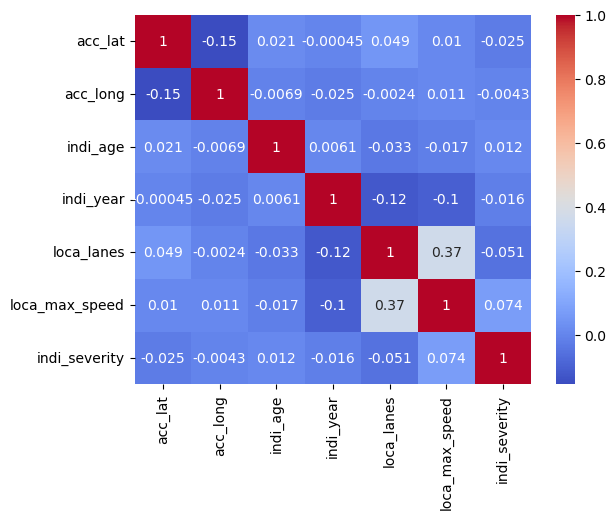

In [58]:

sns.heatmap(df[cols_quant+['indi_severity']].corr(), annot=True, cmap='coolwarm')

In [64]:
# check significance on target
# --------------------------------------------------------------------------------------------------------------------------------
# Define Cramér's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x.dropna(), y.dropna())
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# List of categorical variables to test
cat_vars = cols_cat

# Run tests and collect results
results = []
for var in cat_vars:
    contingency = pd.crosstab(df[var].dropna(), df['indi_severity'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    v = cramers_v(df[var], df['indi_severity'])
    results.append({
        'Variable': var,
        'Chi2': round(chi2, 2),
        'p-value': round(p, 4),
        'Cramér\'s V': round(v, 4)
    })

# Display results as DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                  Variable       Chi2  p-value  Cramér's V
0                 acc_year     358.78      0.0      0.0121
1                acc_month     975.94      0.0      0.0199
2                 acc_hour    6397.97      0.0      0.0510
3    acc_ambient_lightning   11336.17      0.0      0.0679
4   acc_urbanization_level   24284.24      0.0      0.1721
5         acc_intersection    8051.03      0.0      0.0572
6           acc_atmosphere    2692.38      0.0      0.0331
7       acc_collision_type   52031.48      0.0      0.1458
8               indi_place   51606.39      0.0      0.1449
9                 indi_cat   49411.09      0.0      0.1736
10                indi_sex    6765.57      0.0      0.0915
11               indi_trip   30736.92      0.0      0.1127
12           indi_location   38627.90      0.0      0.1718
13             indi_action   75698.58      0.0      0.1754
14              indi_secu1  177101.23      0.0      0.2702
15              indi_secu2   72651.44      0.0      0.22

In [67]:
# check correlation between variables
# --------------------------------------------------------------------------------------------------------------------------------
import itertools

# Define Cramér's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# List of categorical variables
cat_vars = cols_cat

# Compute Cramér's V for all unique pairs
results = []
for var1, var2 in itertools.combinations(cat_vars, 2):
    v = cramers_v(df[var1], df[var2])
    results.append({
        'Variable 1': var1,
        'Variable 2': var2,
        'Cramér\'s V': round(v, 4)
    })

# Convert to DataFrame
cramers_df = pd.DataFrame(results)

pd.set_option('display.max_rows', None)  # Show all rows
display(cramers_df)
pd.reset_option('display.max_rows')


,Variable 1,Variable 2,Cramér's V
0,acc_year,acc_month,0.0520
1,acc_year,acc_hour,0.0188
2,acc_year,acc_ambient_lightning,0.0172
3,acc_year,acc_urbanization_level,0.0325
4,acc_year,acc_intersection,0.0754
5,acc_year,acc_atmosphere,0.0275
6,acc_year,acc_collision_type,0.0329
7,acc_year,indi_place,0.0100
8,acc_year,indi_cat,0.0117
9,acc_year,indi_sex,0.0056


In [70]:
# -------------------------------------------------------------------------------------------------
# replace missing values
# -------------------------------------------------------------------------------------------------
df[cols_quant] = df[cols_quant].fillna(df[cols_quant].mean().round().astype(int))

for col in cols_cat:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isna().sum()


acc_num                   0
indi_vehID                0
indi_place                0
indi_cat                  0
indi_severity             0
indi_sex                  0
indi_trip                 0
indi_secu1                0
indi_secu2                0
indi_location             0
indi_action               0
indi_year                 0
indi_age                  0
acc_ambient_lightning     0
acc_urbanization_level    0
acc_intersection          0
acc_atmosphere            0
acc_collision_type        0
acc_date                  0
acc_year                  0
acc_month                 0
acc_hour                  0
acc_metro                 0
acc_long                  0
acc_lat                   0
veh_cat                   0
veh_fixed_obstacle        0
veh_moving_obstacle       0
veh_impact                0
veh_maneuver              0
veh_id                    0
loca_road_cat             0
loca_traffic_circul       0
loca_lanes                0
loca_road_gradient        0
loca_road_view      

In [76]:
# -------------------------------------------------------------------------------------------------
# encoding of categorical variables
# -------------------------------------------------------------------------------------------------
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
df_encoded = encoder.fit_transform(df[cols_cat])

df_cat_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(cols_cat), index=df.index)

df_new = pd.concat([df.drop(columns=cols_cat), df_cat_encoded], axis=1)

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819788 entries, 0 to 819787
Columns: 279 entries, acc_num to veh_maneuver_26.0
dtypes: Int64(1), datetime64[ns](1), float64(271), int64(4), object(2)
memory usage: 1.7+ GB
